# Calculation of unlensed and lensed rate of detectable events 

# Unlensed events

## BBH/BNS merger rate density
* merger rate as given in https://arxiv.org/pdf/2106.06303.pdf: 
\begin{equation}
\mathcal{R}_m(z_s) = \frac{\mathcal{R}_O(b_4+1)e^{b_2 z_s}}{b_4+e^{b_3 z_s}} \text{Gpc}^{-3}\text{yr}^{-1} \tag{1}
\end{equation}
* $z_s$: redshift of source
* $\mathcal{R}$: local mergerrate. $\mathcal{R}=23.9^{+14.3}_{-8.6}\text{Gpc}^{-3}\text{yr}^{-1}==23.9^{+14.3}_{-8.6} \times 10^{-9}\text{Mpc}^{-3}\text{yr}^{-1}$
* fitting parameters: $b_2=1.6$, $b_3=2.1$, $b_4=30$

## BBH/BNS merger rate at source redshift $z_s$ (in small dz)
\begin{equation} 
R(z_s) = \frac{\mathcal{R}_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} \tag{2}
\end{equation}

* co-moving volume : $\frac{dV_c}{dz_s}$.
* sampling of $z_s$ is done through rejection sampling with the merger rate formula given above.

### Detectable Unlensed events' rate in a year

\begin{equation} 
R_U = \mathcal{N}^U\int dz_s R_o^U(z_s)\left\{\Theta[\rho(z_s,\theta)-\rho_{th}] P(\theta) d\theta \right\} \tag{3}
\end{equation}

* SNR operator $\Theta[\rho(z_s,\theta)-\rho_{th}]$ is a step function
    
* $\mathcal{N}^U$ is the normalizing factor of merger rate distribution wrt $z_s$
\begin{equation}
\mathcal{N}^U = \int_{z_min}^{z_max} dz_s \frac{R_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} \tag{4}
\end{equation}

* $R_o^U(z_s)$ is the normalized merger-rate distribution 
\begin{equation} 
R_o^U(z_s)= \frac{1}{\mathcal{N}^U}\frac{R_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} \tag{5}
\end{equation}

* $\theta \in$ {$m_1$:mass1, $m_2$:mass2, $D_l$:luminosity-distance, $\iota$:inclination-angle, <br>$\psi$:polarization,
$ra$:right-ascension,$dec$:declination,$\phi_c$:phase-of-coalescene,$t_c$:time-of-coalescene}
* $D_l$ is derived from $z_s$

### Sampling methods for compact binary sources
| Parameter | unit | sampling method | range |
| :- | :- | :- | :- |
| $z_s$  | None | merger-rate $R_o^U(z_s)$ | [0,10] |
| $m_1,m_2$ | $\mathcal{M}_{\odot}$ | PowerLaw+PEAK model | [$m_{min}$,$m_{max}$] |
| $ra$  | radian  | Uniform | [0,$2\pi$] |
| $dec$  | radian  | cosine | [$-\pi/2$,$\pi/2$] |
| $\iota$  | radian  | sine | [$0$,$\pi$] |    
| $\psi$  | radian  | Uniform | [$0$,$\pi$] |
| $\phi_c$  | radian  | Uniform | [$0$,$2\pi$] |
| $t_c$  | sec  | Uniform | [$t_{min}$,$t_{max}$] |

## montecarlo integration
\begin{equation} 
R_U = \mathcal{N}^U \left< \Theta[\rho(z_s,\theta)-\rho_{th}]\right>_{z_s,\theta \in Sampled[z_s,\theta]} \tag{6}
\end{equation}
    
\begin{equation} 
R_U = \mathcal{N}^U \left<  P_{det}(z_s,\theta)\right>_{z_s,\theta \in Sampled[z_s,\theta]} \tag{7}
\end{equation}
    
\begin{equation} 
R_U = \frac{\mathcal{N}^U}{N} \sum_i P_{det}(z_s^i,\theta_i)  \tag{8}
\end{equation}

In [1]:
import numpy as np
from ler import LeR

/Users/phurailatpamhemantakumar/anaconda3/envs/lal2/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
# check the input and output
# check of examples
LeR?

Init signature:
LeR(
    nsamples=100000,
    npool=4,
    z_min=0.0,
    z_max=10.0,
    batch_size=25000,
    snr_finder='gwsnr',
    json_file_ler_param='./LeR_params.json',
    **kwargs,
)
Docstring:     
Class to calculate both the rates of lensed and unlensed events.

Parameters
----------
nsamples : `int`
    number of samples for sampling.
    default nsamples = 100000.
npool : `int`
    number of cores to use.
    default npool = 4.
z_min : `float`
    minimum redshift.
    default z_min = 0.
    for popI_II, popIII, primordial, BNS z_min = 0., 5., 5., 0. respectively.
z_max : `float`
    maximum redshift.
    default z_max = 10.
    for popI_II, popIII, primordial, BNS z_max = 10., 40., 40., 2. respectively.
batch_size : `int`
    batch size for SNR calculation.
    default batch_size = 25000.
    reduce the batch size if you are getting memory error.
snr_finder : `str`
    default snr_finder = 'gwsnr'.
    if 'gwsnr', the SNR will be calculated using the gwsnr package.
    i

In [2]:
# Initialization of LeR class with default inputs
# This also initializes the gwsnr (SNR calculator method), 
# CompactBinaryPopulation (for unlensed event sampling) and 
# LensGalaxyPopulation (for lensed event sampling)
# put 
ler = LeR()

Given: IMR waveform, {self.waveform_approximant}.
psds not given. Choosing bilby's default psds
given psds:  {'L1': 'aLIGO_O4_high_asd.txt', 'H1': 'aLIGO_O4_high_asd.txt', 'V1': 'AdV_asd.txt'}
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/halfSNR_dict_4.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/halfSNR_dict_4.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/halfSNR_dict_4.pickle


In [4]:
ler.unlensed_cbc_statistics?

Signature:
ler.unlensed_cbc_statistics(
    nsamples=None,
    resume=False,
    json_file='./gw_params.json',
    **kwargs,
)
Docstring:
Function to generate unlensed GW source parameters.

Parameters
----------
nsamples : `int`
    number of samples.
    default nsamples = 100000.
resume : `bool`
    resume = False (default) or True.
    if True, the function will resume from the last batch.
json_file : `str`
    json file name for storing the parameters.
    default json_file = './gw_params.json'.
kwargs : `dict`
    key word arguments for initializing the ``CompactBinaryPopulation`` class. 

    This initialization is either done at the time of class initialization or at the time of calling this function. 

    Following parameters can be provided, 

    ``m_min`` : `float`
        minimum mass of the compact binary (single).
    ``m_max`` : `float`
        maximum mass of the compact binary (single).
    ``event_type`` : `str`
        event_type = 'popI_II' or `popIII` or `primord

In [5]:
# sampling unlensed events (gw source parameters )
ler.batch_size=50000
ler.unlensed_cbc_statistics(nsamples=100000);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...


In [6]:
# rates
ler.unlensed_rate();

getting gw_params from json file ./gw_params.json...
storing detectable unlensed params in ./gw_params_detectable.json
total unlensed rate with step function: 774.6236489086674
total unlensed rate with pdet function: 847.6841201358307


* remember that absolute value of of rate will inherit errors from the local merger rate
* what matters is the ratio of unlensed and lensed events

In [7]:
# looking at the detectable events
ler.gw_param_detectable = 'default'
ler.gw_param_detectable.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

* both detectable and undetectable events are saved as json file in the current folder

In [8]:
# save memory
ler.gw_param_detectable = None

# Detectable lensed events' rate in a year

$$ R_L = \mathcal{N}^L \int dz_s R_o^L(z_s) \,\mathcal{O}_{images}(z_s,\theta,\mu_i,\Delta t_i, \rho_{th})\, P(\theta) P(\theta_L, z_L|\text{SL},z_s) P(\beta|\text{SL}) d\theta d\beta dz_L d\theta_L dz_s $$
    
* $\mathcal{N}^L$ is the normalizing factor of merger rate distribution (with strong lensing condition applied) wrt $z_s$
$$\mathcal{N}^L = \int_{z_min}^{z_max} dz_s \frac{R_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} \tau(z_s)$$

* $R_o^L(z_s)$ is the normalized merger-rate distribution for strong lensing case
$$ R_o^L(z_s)= \frac{1}{\mathcal{N}^L}\frac{R_m(z_s)}{1+z_s} \frac{dV_c}{dz_s} \tau(z_s)$$

* sampling of $z_s$ is done through rejection sampling with the merger rate formula given above (lensing condition applied)

* SNR operator over all images $$\mathcal{O}_{images}(z_s,\theta,\mu_i,\Delta t_i, \rho_{th}) =  \begin{cases}
        1 & \sum_i^{images} \Theta[\rho(z_s,\theta,\mu_i,\Delta t_i)-\rho_{th}]\ge 2\\
        0 & \text{otherwise}
    \end{cases}$$
    
* Source param: $\theta \in \{m_1,m_2,D_l,\iota,\phi,\psi,ra,dec\}$
* Lens param: $\theta_L \in \{\sigma \text{(velocity-dispersion)},\; q \text{(axis-ratio)},\; \psi \text{(axis-rotaion)},\; \gamma \text{(spectral-index)},\; [\gamma_1,\gamma_2] \text{(external-shear)} \}$
* $z_L$ : redshift of the galaxy lens
* image param: $\{\beta \text{(source position)},\; \mu \text{(magnification)},\; dt \text{(time-delay)}\}$
* sampling of lens parameter will be done wrt https://arxiv.org/abs/2106.06303

## Sampling methods
### lens parameters
<table ><tr><th > Parameter...........<th><th> unit...... <th><th> sampling method.......... <th><th> range...... <tr><tr>
<tr><td> $\gamma_1,\gamma_2$  <td><td> None <td><td> Normal dist. <td><td> [mu,sigma]=[0,0.05] <td><tr>
<tr><td> $\psi$  <td><td> radian <td><td> Uniform <td><td> [$0$,$\pi$] <td><tr>
<tr><td> $\gamma$  <td><td> None <td><td> Normal dist. <td><td> [mu,sigma]=[2,0.2] <td><tr>
<tr><td> $z_L$ <br>from <br>$D_L^c=r D_s^c$ <td><td> None <td><td>  <td><td> [$z_{min}$,$z_{max}$] <td><tr>
<tr><td> $r$ <br>as in <br>$D_L^c=r D_s^c$ <td><td> None <td><td> $P(x)=30x^2(1-x)^2$ <td><td> [0,1] <td><tr>
<tr><td> $\sigma$ <br>from<br>$\sigma=a 161$ <td><td> $km\,s^{-1}$ <td><td>  <td><td>  <td><tr>
<tr><td> $a$ <br>as in <br>$\sigma=a 161$ <td><td> None <td><td> gamma distribution <td><td>  <td><tr>
<tr><td> $q$ <br>from<br>$q=1-b$ <td><td> $ None $ <td><td>  <td><td>  <td><tr>
<tr><td> $b$ <br>as in <br>$q=1-b$ <td><td> None <td><td> Rayleigh distribution <td><td> $b<0.8$ <td><tr><table>   
    
### image parameters
* Einstein radius: $$ \theta_E = \frac{4\pi \sigma^2}{c^2}\frac{D_{Ls}}{D_s} $$
* Souce position in lens plane : $\beta = [x,y] = [\eta\,cos(\phi),\eta\,sin(\phi)]$ 
* sampling methos: 
<table ><tr><th >Parameter <th><th> unit <th><th> sampling method <tr><tr>
<tr><td> $x$  <td><td> $\theta_E$ <td><td> within caustic <td><tr>
<tr><td> $y$  <td><td> radian  <td><td> within caustic <td><tr><table> 

## montecarlo integration
$$ R_L = \mathcal{N}^U \left< \mathcal{O}_{images}(z_s,\theta,\mu_i,\Delta t_i, \rho_{th})\,\right>_{z_s,z_L,\theta,\theta_L \in \text{Sampled}[z_s,z_L,\theta,\theta_L]} $$
$$ R_L = \mathcal{N}^U \left< \,P_{det}^{max(\rho)_1} \,P_{det}^{max(\rho)_2} \,\right>_{z_s,z_L,\theta,\theta_L \in \text{Sampled}[z_s,z_L,\theta,\theta_L]} $$
$$ R_L = \frac{\mathcal{N}^U}{N} \sum_i \,P_{det}^{max(\rho)_1} \,P_{det}^{max(\rho)_2} \,  $$
* $max(\rho)_1$ : $1^{st}$ maximum SNR out of all the images for the given parameters {$z_s,z_L,\theta,\theta_L$} 
* $max(\rho)_2$ : $2^{st}$ maximum SNR out of all the images for the given parameters {$z_s,z_L,\theta,\theta_L$} 
* $\rho_{th}$ for $max(\rho)_2$ can lower than that of $max(\rho)_1$ if it is a subthreshhold search.

In [9]:
ler.lensed_cbc_statistics?

Signature:
ler.lensed_cbc_statistics(
    nsamples=None,
    resume=False,
    json_file='./lensed_params.json',
    **kwargs,
)
Docstring:
Function to generate lensed GW source parameters, lens galaxy parameters and image paramters.

Parameters
----------
nsamples : `int`
    number of samples.
    default nsamples = 100000.
resume : `bool`
    resume = False (default) or True.
    if True, the function will resume from the last batch.
json_file : `str`
    json file name for storing the parameters.
    default json_file = './lensed_params.json'.
kwargs : `dict`
    key word arguments for initializing the ``LensGalaxyPopulation`` class. 

    This initialization is either done at the time of class initialization or at the time of calling this function. 

    Following parameters can be provided, 

    ``min_lensed_images`` : `int`
        minimum number of lensed images.
    ``max_lensed_images`` : `int`
        maximum number of lensed images.
    ``lensModelList`` : `list`
        l

In [9]:
# sampling lens parameters and image(s) parameters
ler.lensed_cbc_statistics(nsamples=100000);

chosen batch size = 50000. If you want to change batch size, self.batch_size = new_size
There will be 2 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:37<00:00, 1350.16it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|███████████████████████████████████████████████████████| 50000/50000 [00:10<00:00, 4624.63it/s]


calculating snrs...


In [10]:
# lensed rates
ler.lensed_rate();

getting lensed_param from json file ./lensed_params.json...
storing detectable lensed params in ./lensed_params_detectable.json...
total lensed rate with step function: 0.9532014267311998
total lensed rate with pdet function: 0.940689920622204


In [11]:
# looking at the detectable events
ler.lensed_param_detectable = 'default'
ler.lensed_param_detectable.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

* both detectable and undetectable events are saved as json file in the current folder

In [12]:
# save memory
ler.lensed_param_detectable = None

### Comparision

In [13]:
ler.rate_comparision();

getting gw_params from json file ./gw_params.json...
storing detectable unlensed params in ./gw_params_detectable.json
total unlensed rate with step function: 774.6236489086674
total unlensed rate with pdet function: 847.6841201358307
getting lensed_param from json file ./lensed_params.json...
storing detectable lensed params in ./lensed_params_detectable.json...
total lensed rate with step function: 0.9532014267311998
total lensed rate with pdet function: 0.940689920622204
unlensed/lensed rate ratio =  (812.6547308736972, 901.1302253298768)


## Getting the parameters from the stored json files

In [14]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [15]:
# detectable unlensed events
f = open ('gw_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'zs', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

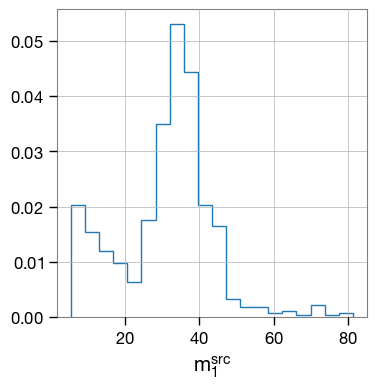

In [16]:
plt.hist(data['mass_1_source'], histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.show()

In [17]:
# detectable lensed events
f = open ('lensed_params_detectable.json', "r")
data = json.loads(f.read())

data.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'e1', 'e2', 'gamma1', 'gamma2', 'Dl', 'Ds', 'Dls', 'theta_E', 'gamma', 'mass_1', 'mass_2', 'mass_1_source', 'mass_2_source', 'luminosity_distance', 'iota', 'psi', 'phase', 'geocent_time', 'ra', 'dec', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'n_images', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'weights', 'opt_snr_net', 'L1', 'H1', 'V1', 'pdet_net'])

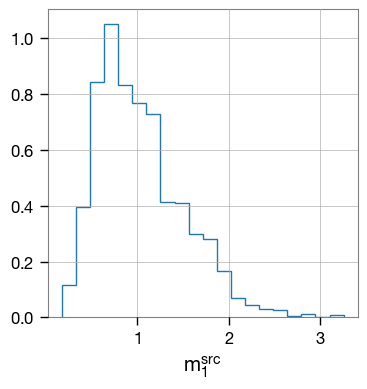

In [18]:
plt.hist(np.log10(np.array(data['magnifications']).flatten()), histtype='step', density=True, bins=20)
plt.xlabel(r'$m_1^{src}$')
plt.show()

# with more accurate snr 

In [ ]:
ler_ = LeR(npool=6,z_min=0., z_max=10.,snr_type = 'inner_product',\
           psds={'L1':'aLIGOaLIGODesignSensitivityT1800044','H1':'aLIGOaLIGODesignSensitivityT1800044','V1':'AdvVirgo'}, \
           waveform_inspiral_must_be_above_fmin=False)

In [ ]:
ler_ = LeR(npool=6,z_min=0., z_max=10.,snr_type = 'interpolation',\
           psds={'L1':'aLIGOaLIGODesignSensitivityT1800044','H1':'aLIGOaLIGODesignSensitivityT1800044','V1':'AdvVirgo'}, \
           waveform_inspiral_must_be_above_fmin=False, nsamples_mtot=200, nsamples_mass_ratio=500)